In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [29]:
# Load the dataset
data = pd.read_csv('Live.csv')
print(f"Dataset shape: {data.shape}")
data.head()


Dataset shape: (7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [30]:
# Check for missing values and basic info
data.info()
print("\nMissing values:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [31]:

features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes']
X = data[features].copy()
X = X.dropna()
print(f"Data shape after cleaning: {X.shape}")


Data shape after cleaning: (7050, 4)


In [32]:
X.describe()


,num_reactions,num_comments,num_shares,num_likes
count,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121
std,462.625309,889.636820,131.599965,449.472357
min,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000
50%,59.500000,4.000000,0.000000,58.000000
75%,219.000000,23.000000,4.000000,184.750000
max,4710.000000,20990.000000,3424.000000,4710.000000


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized")


Features standardized


In [34]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

print("Elbow method completed successfully")


Elbow method completed successfully


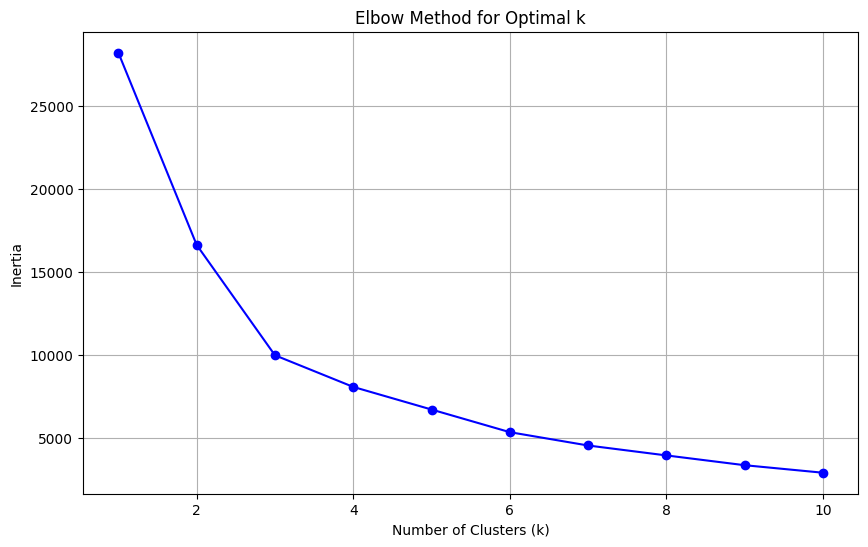

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [36]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
X['Cluster'] = clusters
print(f"Clustering completed with k={optimal_k}")
print(f"Cluster distribution: {np.bincount(clusters)}")


Clustering completed with k=4
Cluster distribution: [6130  395   71  454]


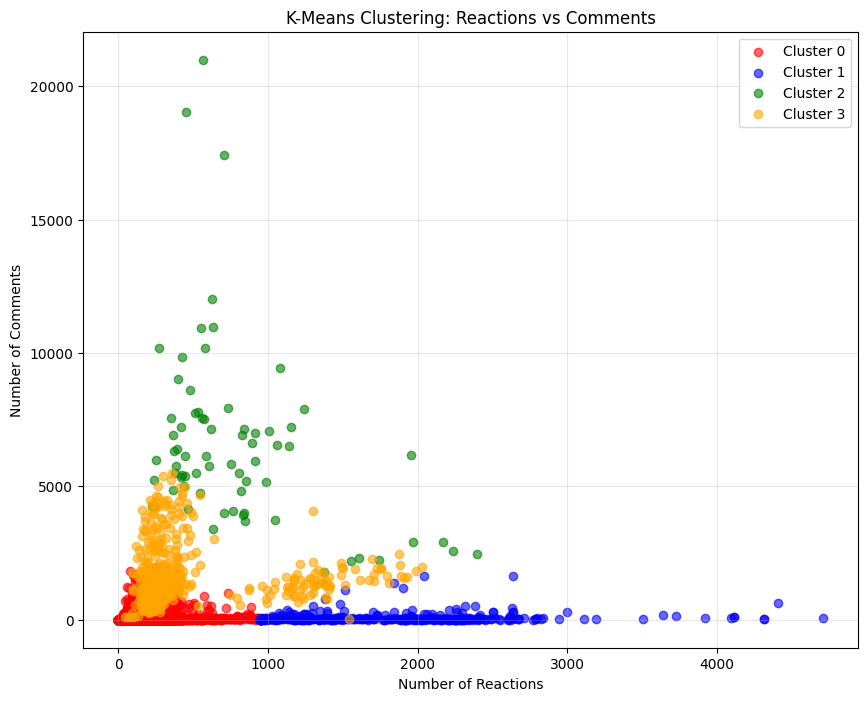

In [37]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(optimal_k):
    cluster_data = X[X['Cluster'] == i]
    plt.scatter(cluster_data['num_reactions'], cluster_data['num_comments'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('K-Means Clustering: Reactions vs Comments')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


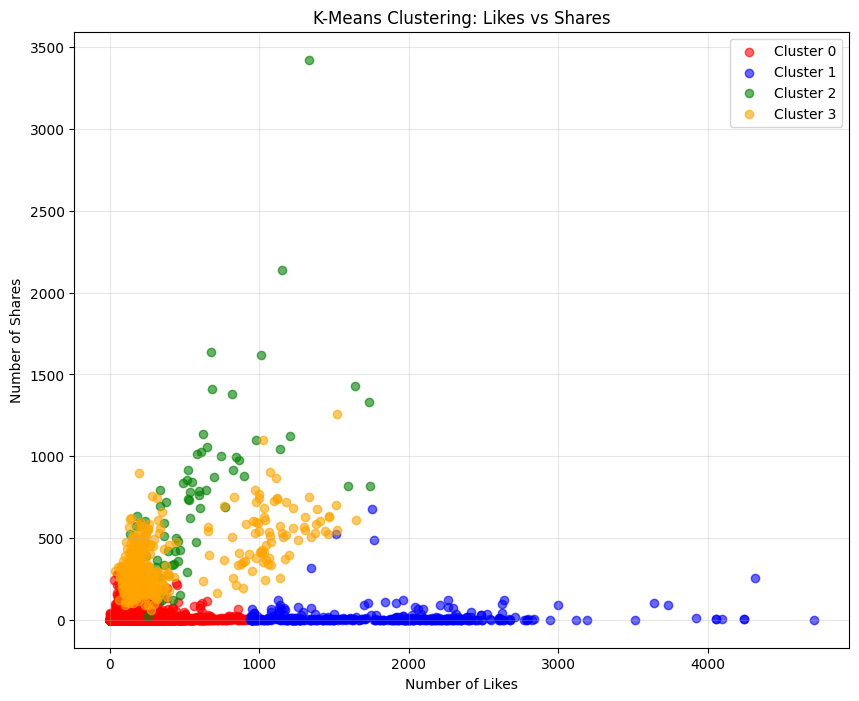

In [38]:
# Visualize clusters - likes vs shares
plt.figure(figsize=(10, 8))

for i in range(optimal_k):
    cluster_data = X[X['Cluster'] == i]
    plt.scatter(cluster_data['num_likes'], cluster_data['num_shares'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Number of Likes')
plt.ylabel('Number of Shares')
plt.title('K-Means Clustering: Likes vs Shares')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [39]:
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers_original, columns=features)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]
print("Cluster Centers (Original Scale):")
centers_df


Cluster Centers (Original Scale):


,num_reactions,num_comments,num_shares,num_likes
Cluster 0,105.994943,53.992496,11.218760,100.091843
Cluster 1,1784.379747,74.860759,16.379747,1774.027848
Cluster 2,789.267606,6564.718310,753.859155,596.408451
Cluster 3,466.319383,1663.151982,337.872247,351.112335


In [40]:

print("Cluster Summary Statistics:")
for i in range(optimal_k):
    cluster_data = X[X['Cluster'] == i][features]
    print(f"\nCluster {i} (n={len(cluster_data)}):")
    print(cluster_data.mean().round(2))


Cluster Summary Statistics:

Cluster 0 (n=6130):
num_reactions    105.99
num_comments      53.99
num_shares        11.22
num_likes        100.09
dtype: float64

Cluster 1 (n=395):
num_reactions    1784.38
num_comments       74.86
num_shares         16.38
num_likes        1774.03
dtype: float64

Cluster 2 (n=71):
num_reactions     789.27
num_comments     6564.72
num_shares        753.86
num_likes         596.41
dtype: float64

Cluster 3 (n=454):
num_reactions     466.32
num_comments     1663.15
num_shares        337.87
num_likes         351.11
dtype: float64


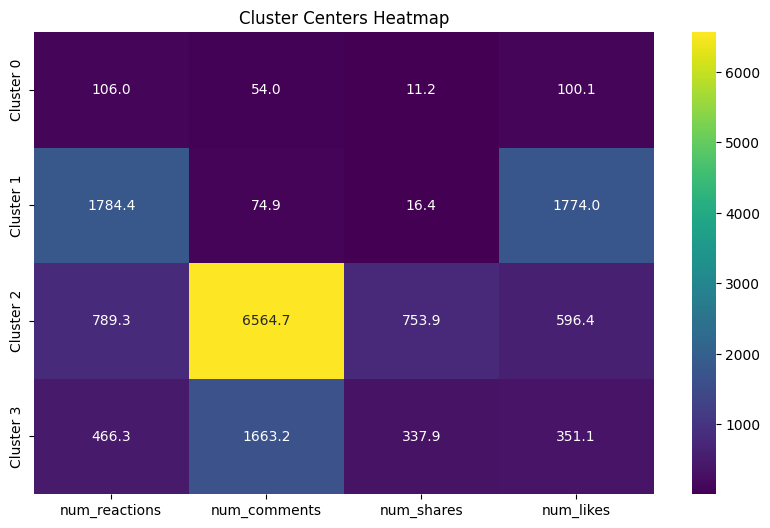

In [41]:

plt.figure(figsize=(10, 6))
sns.heatmap(centers_df, annot=True, cmap='viridis', fmt='.1f')
plt.title('Cluster Centers Heatmap')
plt.show()
